<a href="https://colab.research.google.com/github/Meta-Sean/Short-is-Long/blob/main/Short_Sales_Daily_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#TODO: Add multiple days of short data together
# Format the date
# Either Scrap the Webpage or Use Text Fil
# Turn the Data into a Pandas DataFrame
FINRA0801_df = pd.read_csv("CNMSshvol20220801.txt", sep="|")
FINRA0802_df = pd.read_csv("CNMSshvol20220802.txt", sep="|")
FINRA0804_df = pd.read_csv("CNMSshvol20220804.txt", sep="|")
FINRA0805_df = pd.read_csv("CNMSshvol20220805.txt", sep="|")
FINRA_df = pd.concat([FINRA0801_df, FINRA0802_df, FINRA0804_df, FINRA0805_df], ignore_index=True)
EDGX0801_df = pd.read_csv("EDGAshvol20220801.txt", sep="|")
EDGX0802_df = pd.read_csv("EDGAshvol20220802.txt", sep="|")
EDGX0803_df = pd.read_csv("EDGAshvol20220803.txt", sep="|")
EDGX0804_df = pd.read_csv("EDGAshvol20220804.txt", sep="|")
EDGX0805_df = pd.read_csv("EDGAshvol20220805.txt", sep="|")
EDGX_df = pd.concat([EDGX0801_df, EDGX0802_df,EDGX0803_df, EDGX0804_df, EDGX0805_df], ignore_index=True)
# EDA and use a Bar plot to look at the short volume and total volume noting the venue

# Informs the 'physics' of the trade momentum factors: Volume / Float / Short Volume - Theme / Dilution

In [ ]:
# Turn Dates column into human read-able datetime types
FINRA_df = FINRA_df.dropna()
FINRA_df['Date'] = pd.to_datetime(FINRA_df["Date"], format='%Y%m%d')
FINRA_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,2022-08-01,A,192157.0,29.0,307293.0,"B,Q,N"
1,2022-08-01,AA,1063671.0,3747.0,2661930.0,"B,Q,N"
2,2022-08-01,AAAU,564932.0,0.0,1299005.0,"Q,N"
3,2022-08-01,AAC,31220.0,0.0,65707.0,Q
4,2022-08-01,AAC/U,240.0,0.0,2560.0,Q
...,...,...,...,...,...,...
39662,2022-08-05,ZWS,123888.0,0.0,340111.0,"B,Q,N"
39663,2022-08-05,ZY,64283.0,7124.0,374824.0,"B,Q,N"
39664,2022-08-05,ZYME,81919.0,0.0,269891.0,"B,Q,N"
39665,2022-08-05,ZYNE,101147.0,3627.0,311632.0,"B,Q,N"


In [ ]:
EDGX_df = EDGX_df.dropna()
EDGX_df['Date'] = pd.to_datetime(EDGX_df["Date"], format='%Y%m%d')
EDGX_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Symbol,Short Volume,Total Volume,Market Center
0,2022-08-01,A,16133,24726,J
1,2022-08-01,AA,8188,18489,J
2,2022-08-01,AAAU,11673,16519,J
3,2022-08-01,AAC,1436,1638,J
4,2022-08-01,AACG,300,300,J
...,...,...,...,...,...
37371,2022-08-05,ZWS,4268,11066,J
37372,2022-08-05,ZY,16656,28478,J
37373,2022-08-05,ZYME,6457,17481,J
37374,2022-08-05,ZYNE,1187,1886,J


In [ ]:
# Take a user ticker and output the relevant row 
ticker = input("What ticker should we look up? ")

edgx_ticker_indexes = (EDGX_df.index[EDGX_df['Symbol']==ticker].tolist())
finra_ticker_indexes = (FINRA_df.index[FINRA_df['Symbol']==ticker].tolist())



What ticker should we look up? GOVX


In [ ]:
edgx_ticker_indexes


[2928, 10403, 17965, 25466, 32941]

In [ ]:
finra_ticker_indexes

[3920, 13878, 23830, 33716]

In [ ]:
finra_dict = {}
for index in finra_ticker_indexes:
  finra_dict['Date'] = FINRA_df['Date'][finra_ticker_indexes]
  #FINRA_df['Symbol'][finra_ticker_indexes]
  finra_dict['Short Volume'] = FINRA_df['ShortVolume'][finra_ticker_indexes]
  #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
  finra_dict['Total Volume'] = FINRA_df['TotalVolume'][finra_ticker_indexes]
  #FINRA_df['Market'][finra_ticker_indexes]

finra_dict
edgx_dict = {}
for index in edgx_ticker_indexes:
  edgx_dict['Date'] = EDGX_df['Date'][edgx_ticker_indexes]
  #FINRA_df['Symbol'][finra_ticker_indexes]
  edgx_dict['Short Volume'] = EDGX_df['Short Volume'][edgx_ticker_indexes]
  #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
  edgx_dict['Total Volume'] = EDGX_df['Total Volume'][edgx_ticker_indexes]
  #FINRA_df['Market'][finra_ticker_indexes]

edgx_dict

{'Date': 2928    2022-08-01
 10403   2022-08-02
 17965   2022-08-03
 25466   2022-08-04
 32941   2022-08-05
 Name: Date, dtype: datetime64[ns], 'Short Volume': 2928     246737
 10403     64584
 17965     20735
 25466     76165
 32941     64360
 Name: Short Volume, dtype: int64, 'Total Volume': 2928     388987
 10403     96306
 17965     24142
 25466     98557
 32941    102888
 Name: Total Volume, dtype: int64}

496         40410.0
10426    25817905.0
20390    30289277.0
30284    11298763.0
Name: ShortVolume, dtype: float64

463008.0

In [ ]:
FINRA_ticker_df = pd.DataFrame(finra_dict)
FINRA_ticker_df = FINRA_ticker_df.set_index('Date')

EDGX_ticker_df = pd.DataFrame(edgx_dict)
EDGX_ticker_df = EDGX_ticker_df.set_index('Date')

In [ ]:
EDGX_ticker_df


,Short Volume,Total Volume
Date,,
2022-08-01,246737,388987
2022-08-02,64584,96306
2022-08-03,20735,24142
2022-08-04,76165,98557
2022-08-05,64360,102888


In [ ]:
FINRA_ticker_df

,Short Volume,Total Volume
Date,,
2022-08-01,33661416.0,59231054.0
2022-08-02,12910034.0,23418620.0
2022-08-04,29168601.0,53088566.0
2022-08-05,14957186.0,28214177.0


In [ ]:
EDGX_ticker_df.to_csv("EDGX-GOVX.csv")
FINRA_ticker_df.to_csv("FINRA-GOVX.csv")

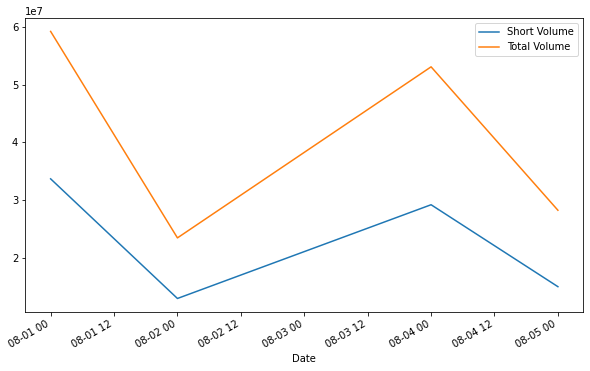

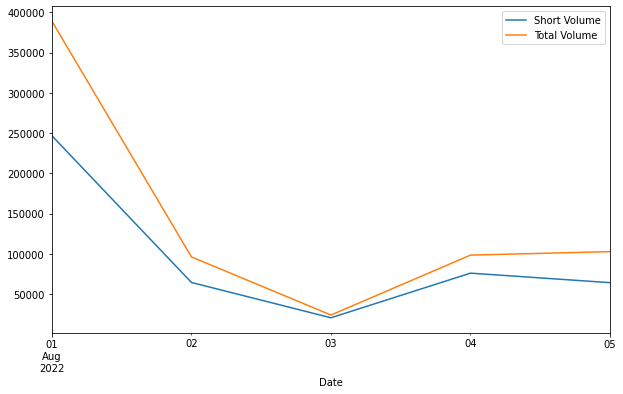

In [ ]:
FINRA_ticker_df.plot.line(y=['Short Volume', 'Total Volume'], figsize=(10,6))
EDGX_ticker_df.plot.line(y=['Short Volume', 'Total Volume'], figsize=(10,6))

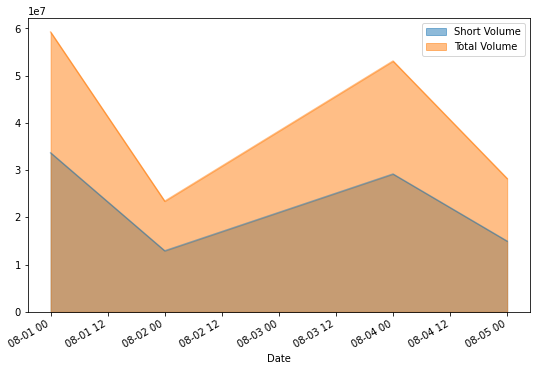

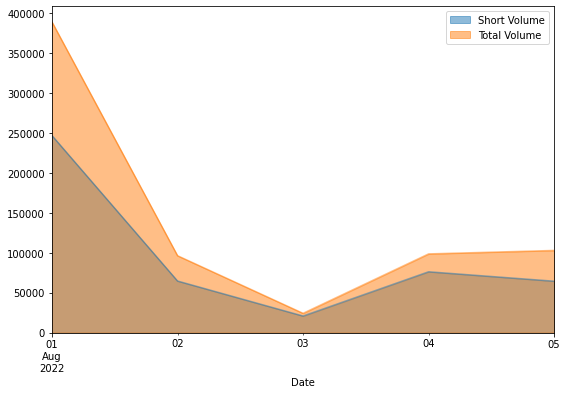

In [ ]:
FINRA_ticker_df.plot(kind='area', stacked=False, figsize=(9,6))
EDGX_ticker_df.plot(kind='area', stacked=False, figsize=(9,6))

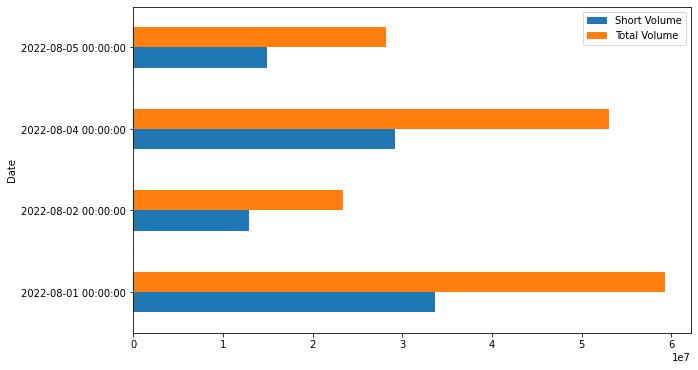

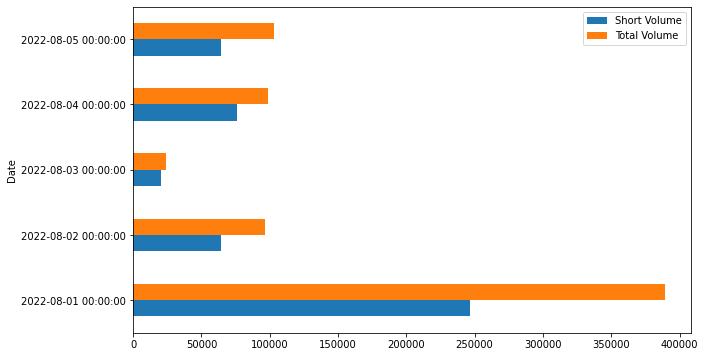

In [ ]:
FINRA_ticker_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')
EDGX_ticker_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')